In [1]:
from DataSet import DataSet
import matplotlib.pyplot as plt 
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from os import listdir
from os.path import isfile, join
import re
import os
import numpy as np
device = torch.device("cpu")

manual_seed = 12
random.seed(manual_seed)
torch.manual_seed(manual_seed)

In [2]:
files = [
    'data/LFI_SkyMap_070_2048_R2.01_full.fits',
    'data/HFI_SkyMap_100_2048_R2.02_full.fits',
    'data/HFI_SkyMap_143_2048_R2.02_full.fits',
    'data/HFI_SkyMap_217_2048_R2.02_full.fits',
    'data/HFI_SkyMap_353_2048_R2.02_full.fits',
    'data/HFI_SkyMap_545_2048_R2.02_full.fits',
    'data/HFI_SkyMap_857_2048_R2.02_full.fits'
]
ds = DataSet(files, batch_size=16)

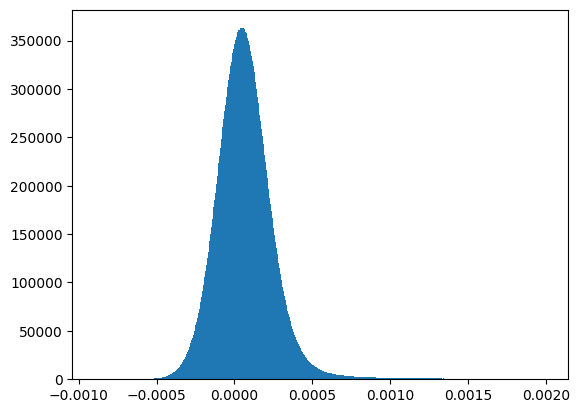

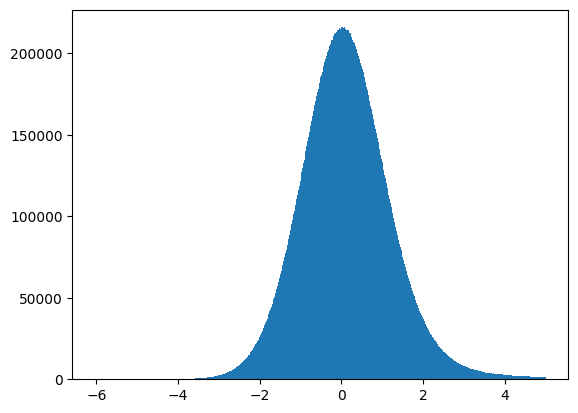

In [7]:
x = ds.m[0].wmap.flatten()
plt.hist(x[x<0.002], bins=1000)
plt.figure()
x = (x - 4.3770884e-05) / 0.0001558874
x = x[x < 5]
x=plt.hist(x, bins=1000)

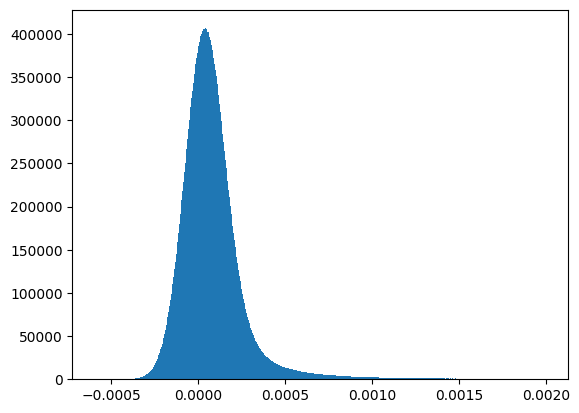

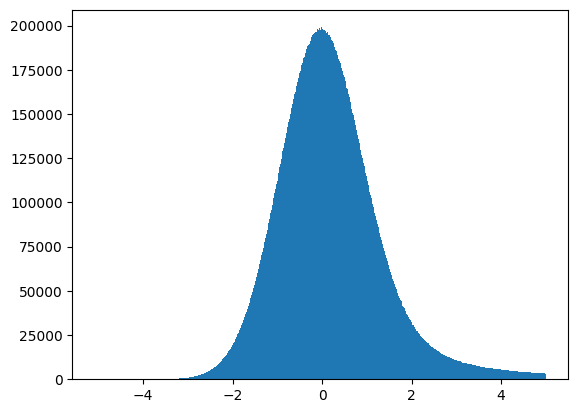

In [8]:
x = ds.m[1].wmap.flatten()
plt.hist(x[x<0.002], bins=1000)
plt.figure()
x = (x - 4.2957174e-05) / 0.00012528372
x = x[x < 5]
x=plt.hist(x, bins=1000)

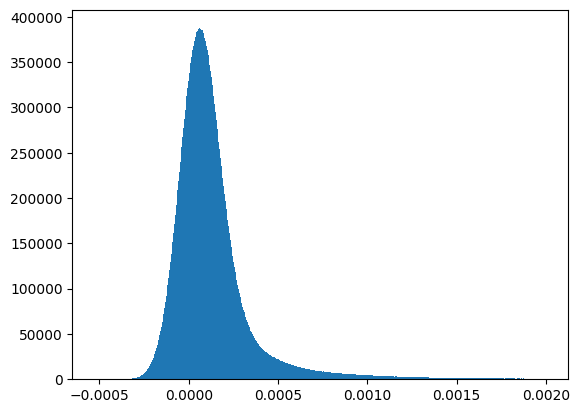

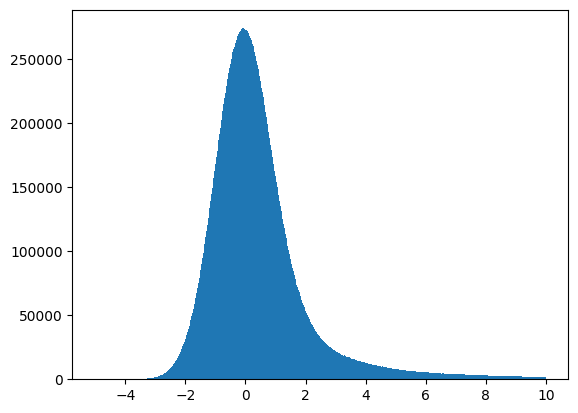

In [10]:
x = ds.m[2].wmap.flatten()
plt.hist(x[x<0.002], bins=1000)
plt.figure()
x = (x - 7.015532e-05) / 0.00011884114
x = x[x < 10]
x=plt.hist(x, bins=1000)

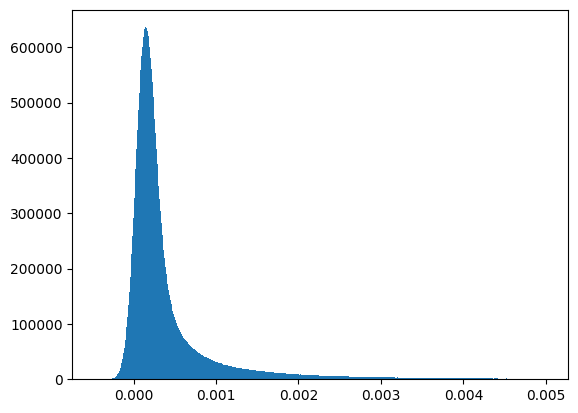

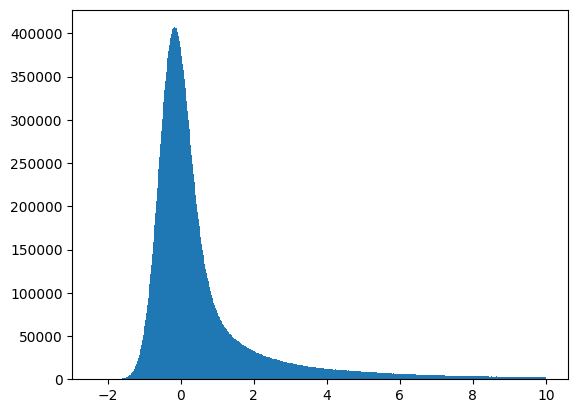

In [17]:
x = ds.m[3].wmap.flatten()
plt.hist(x[x<0.005], bins=1000)
plt.figure()
x = (x - 0.00019576303) / 0.00028319965
x = x[x < 10]
x=plt.hist(x, bins=1000)

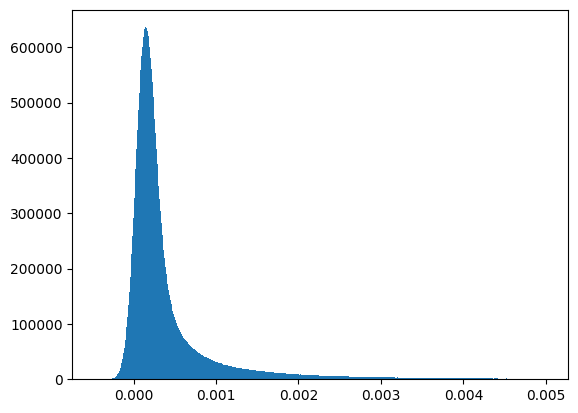

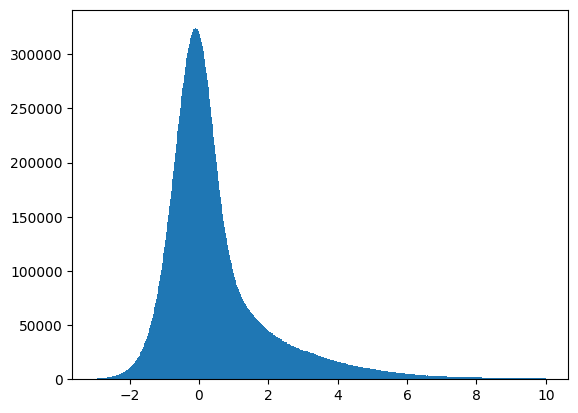

In [18]:
x = ds.m[3].wmap.flatten()
plt.hist(x[x<0.005], bins=1000)
plt.figure()
x = (np.log(x + abs(-0.0004694812) + 1e-9) - -7.313942) / 0.33913994
x = x[x < 10]
x = x[x > -3]
x=plt.hist(x, bins=1000)

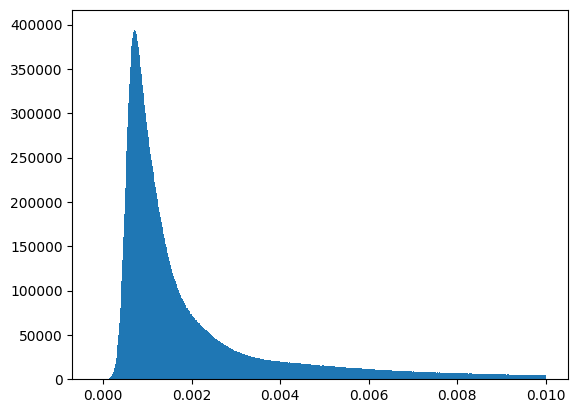

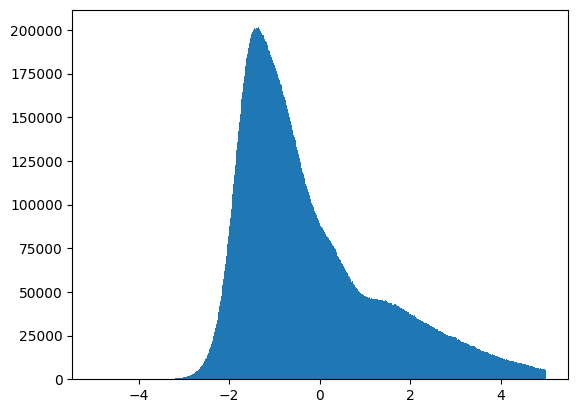

In [21]:
x = ds.m[4].wmap.flatten()
plt.hist(x[x<0.01], bins=1000)
plt.figure()
x = (np.log(x + abs(-0.00018964667) + 1e-9) - -7.2715349197387695) / (-5.037784576416016 - -7.2715349197387695) * 4 - 2
x = x[x < 5]
x = x[x > -5]
x=plt.hist(x, bins=1000)

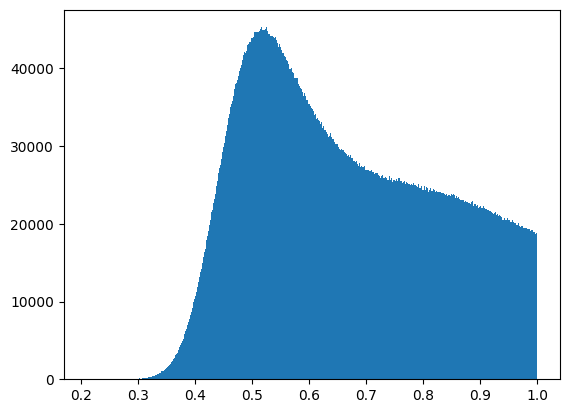

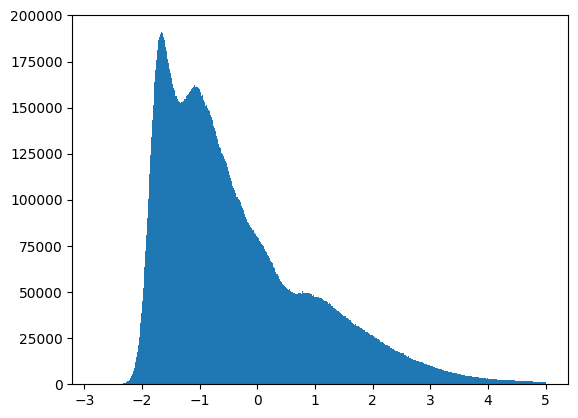

In [25]:
x = ds.m[5].wmap.flatten()
plt.hist(x[x<1], bins=1000)
plt.figure()
x = (np.log(x) - -0.8962784516811371) / (2.3570188379287718 - -0.8962784516811371) * 4 - 2
x = x[x < 5]
x = x[x > -5]
x=plt.hist(x, bins=1000)

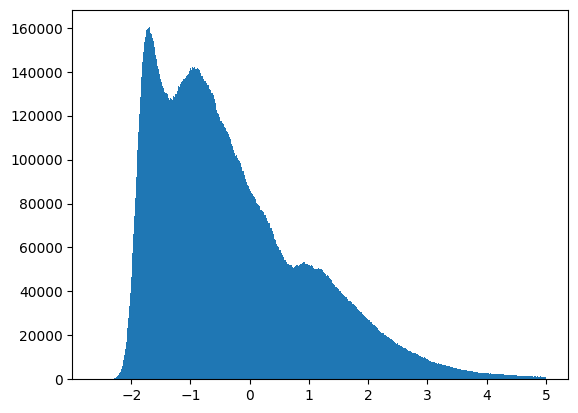

In [27]:
x = ds.m[6].wmap.flatten()
plt.hist(x, bins=1000)
flt.figure()
x = (np.log(x) - -0.17313669502735138) / (3.4202518463134766 - -0.17313669502735138) * 4 - 2
x = x[x < 5]
x = x[x > -5]
x=plt.hist(x, bins=1000)

In [2]:
# Spericat distr

In [3]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

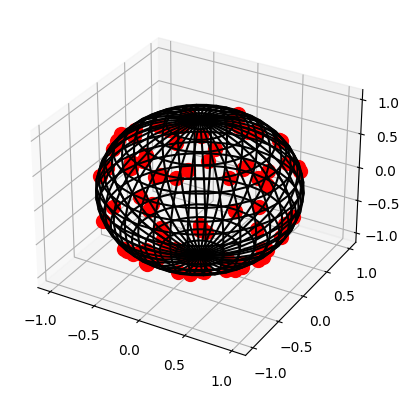

In [51]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(100)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
for i in range(100):
    phi = np.arctan2(yi[i], xi[i]) / np.pi * 180
    theta = np.arccos(zi[i]) / np.pi * 180
    if 80 <= theta <= 100:
        continue
    ax.scatter(xi[i], yi[i], zi[i], s=100, c='r', zorder=10)

In [29]:
theta = np.arccos(zi) / np.pi * 180
np.where((theta > 80) & (theta < 100))

(array([ 5,  9, 11, 20, 28, 37, 39, 42, 45, 49, 52, 58, 59, 70, 77, 91]),)

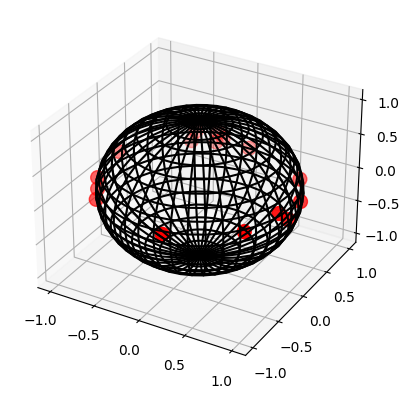

In [30]:
ids = np.where((theta > 80) & (theta < 100))
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi[ids], yi[ids], zi[ids], s=100, c='r', zorder=10)